In [48]:
import requests
import pandas as pd
import datetime as dt
from datetime import timedelta
import subprocess
import json
import os
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser

columns: <br/>
timestamp	count	uniques	day	mo	yr	collection_timestamp yr_mo_day

Example data: <br/>
'timestamp': '2019-10-07T00:00:00Z', 'count': 18, 'uniques': 1

In [101]:
def string_date(month, day, year):
    return year + '-' + month + '-' + day + 'T00:00:00Z'

def generate_14_days(month, day, year):
    start_date = string_date(month, day, year)
    start = dateutil.parser.parse(start_date)
    return [start + timedelta(hours=24*i) for i in range(14)]

def generate_data(start, part1, part2):
    mo, dy, yr = start
    days = generate_14_days(mo, dy, yr)
    ret_arr = []
    for i in range(14):
        ret_arr.append({
            'timestamp': days[i].isoformat()[:10] + 'T00:00:00Z', 
            'count': part1[i],
            'uniques': part2[i]
        })
    return ret_arr

def data_json_maker(kind, count, unique, data):
    return {
        'count': str(count),
        'uniques': str(unique),
        kind: data
    }

def generate_json_file(start, part1, part2, kind, count, unique):
    data = generate_data(start, part1, part2)
    json_format = data_json_maker(kind, count, unique, data)
    yr, mo, dy = start
    file_name = yr + '-' + mo + '-' + dy + '_' + kind + '-json.json'
    print(json_format)
    with open(file_name, 'w') as outfile:
        json.dump(json_format, outfile, indent=4)
    return json_format

In [127]:
# generate_data(('07', '27', '2019'), part1_08_08, part2_08_08)
start_date = ('07', '27', '2019')
part1_08_08 = [
    11, 4, 17, 28, 16, 28, 10, 16, 10, 30, 29, 32, 21, 0
]
part2_08_08 = [
    7, 4, 10, 16, 10, 14, 7, 8, 7, 14, 15, 17, 15, 0
]

# August 27th 2019
json_obj_1 = generate_json_file(start_date, part1_08_08, part2_08_08, 
                   'clones', 238, 133)

{'count': '238', 'uniques': '133', 'clones': [{'timestamp': '2019-07-27T00:00:00Z', 'count': 11, 'uniques': 7}, {'timestamp': '2019-07-28T00:00:00Z', 'count': 4, 'uniques': 4}, {'timestamp': '2019-07-29T00:00:00Z', 'count': 17, 'uniques': 10}, {'timestamp': '2019-07-30T00:00:00Z', 'count': 28, 'uniques': 16}, {'timestamp': '2019-07-31T00:00:00Z', 'count': 16, 'uniques': 10}, {'timestamp': '2019-08-01T00:00:00Z', 'count': 28, 'uniques': 14}, {'timestamp': '2019-08-02T00:00:00Z', 'count': 10, 'uniques': 7}, {'timestamp': '2019-08-03T00:00:00Z', 'count': 16, 'uniques': 8}, {'timestamp': '2019-08-04T00:00:00Z', 'count': 10, 'uniques': 7}, {'timestamp': '2019-08-05T00:00:00Z', 'count': 30, 'uniques': 14}, {'timestamp': '2019-08-06T00:00:00Z', 'count': 29, 'uniques': 15}, {'timestamp': '2019-08-07T00:00:00Z', 'count': 32, 'uniques': 17}, {'timestamp': '2019-08-08T00:00:00Z', 'count': 21, 'uniques': 15}, {'timestamp': '2019-08-09T00:00:00Z', 'count': 0, 'uniques': 0}]}


In [128]:
start_date = ('07', '30', '2019')

part1_08_12 = [
    28, 16, 28, 10, 16, 10, 30, 29, 32, 21, 34, 34, 33, 25
]
part2_08_12 = [
    16, 10, 14, 7, 8, 7, 14, 15, 17, 15, 17, 18, 19, 15
]

json_obj_2 = generate_json_file(start_date, part1_08_12, part2_08_12, 'clones', 
                  332, 168)

{'count': '332', 'uniques': '168', 'clones': [{'timestamp': '2019-07-30T00:00:00Z', 'count': 28, 'uniques': 16}, {'timestamp': '2019-07-31T00:00:00Z', 'count': 16, 'uniques': 10}, {'timestamp': '2019-08-01T00:00:00Z', 'count': 28, 'uniques': 14}, {'timestamp': '2019-08-02T00:00:00Z', 'count': 10, 'uniques': 7}, {'timestamp': '2019-08-03T00:00:00Z', 'count': 16, 'uniques': 8}, {'timestamp': '2019-08-04T00:00:00Z', 'count': 10, 'uniques': 7}, {'timestamp': '2019-08-05T00:00:00Z', 'count': 30, 'uniques': 14}, {'timestamp': '2019-08-06T00:00:00Z', 'count': 29, 'uniques': 15}, {'timestamp': '2019-08-07T00:00:00Z', 'count': 32, 'uniques': 17}, {'timestamp': '2019-08-08T00:00:00Z', 'count': 21, 'uniques': 15}, {'timestamp': '2019-08-09T00:00:00Z', 'count': 34, 'uniques': 17}, {'timestamp': '2019-08-10T00:00:00Z', 'count': 34, 'uniques': 18}, {'timestamp': '2019-08-11T00:00:00Z', 'count': 33, 'uniques': 19}, {'timestamp': '2019-08-12T00:00:00Z', 'count': 25, 'uniques': 15}]}


In [129]:
start_date = ('08', '02', '2019')

part1_08_15 = [
    10, 16, 10, 30, 29, 32, 21, 34, 34, 33, 44, 48, 48, 42
]
part2_08_15 = [
    7, 8, 7, 14, 15, 17, 15, 17, 18, 19, 22, 20, 23, 22
]

json_obj_3 = generate_json_file(start_date, part1_08_15, part2_08_15, 'clones', 
                  409, 193)

{'count': '409', 'uniques': '193', 'clones': [{'timestamp': '2019-08-02T00:00:00Z', 'count': 10, 'uniques': 7}, {'timestamp': '2019-08-03T00:00:00Z', 'count': 16, 'uniques': 8}, {'timestamp': '2019-08-04T00:00:00Z', 'count': 10, 'uniques': 7}, {'timestamp': '2019-08-05T00:00:00Z', 'count': 30, 'uniques': 14}, {'timestamp': '2019-08-06T00:00:00Z', 'count': 29, 'uniques': 15}, {'timestamp': '2019-08-07T00:00:00Z', 'count': 32, 'uniques': 17}, {'timestamp': '2019-08-08T00:00:00Z', 'count': 21, 'uniques': 15}, {'timestamp': '2019-08-09T00:00:00Z', 'count': 34, 'uniques': 17}, {'timestamp': '2019-08-10T00:00:00Z', 'count': 34, 'uniques': 18}, {'timestamp': '2019-08-11T00:00:00Z', 'count': 33, 'uniques': 19}, {'timestamp': '2019-08-12T00:00:00Z', 'count': 44, 'uniques': 22}, {'timestamp': '2019-08-13T00:00:00Z', 'count': 48, 'uniques': 20}, {'timestamp': '2019-08-14T00:00:00Z', 'count': 48, 'uniques': 23}, {'timestamp': '2019-08-15T00:00:00Z', 'count': 42, 'uniques': 22}]}


In [130]:
start_date = ('08', '06', '2019')

part1_08_19 = [
    29, 32, 21, 34, 34, 33, 44, 46, 46, 42, 33, 24, 20, 13
]
part2_08_19 = [
    15, 17, 15, 17, 18, 19, 22, 20, 23, 22, 20, 18, 13, 10
]

json_obj_4 = generate_json_file(start_date, part1_08_19, part2_08_19, 'clones', 
                  427, 210)

{'count': '427', 'uniques': '210', 'clones': [{'timestamp': '2019-08-06T00:00:00Z', 'count': 29, 'uniques': 15}, {'timestamp': '2019-08-07T00:00:00Z', 'count': 32, 'uniques': 17}, {'timestamp': '2019-08-08T00:00:00Z', 'count': 21, 'uniques': 15}, {'timestamp': '2019-08-09T00:00:00Z', 'count': 34, 'uniques': 17}, {'timestamp': '2019-08-10T00:00:00Z', 'count': 34, 'uniques': 18}, {'timestamp': '2019-08-11T00:00:00Z', 'count': 33, 'uniques': 19}, {'timestamp': '2019-08-12T00:00:00Z', 'count': 44, 'uniques': 22}, {'timestamp': '2019-08-13T00:00:00Z', 'count': 46, 'uniques': 20}, {'timestamp': '2019-08-14T00:00:00Z', 'count': 46, 'uniques': 23}, {'timestamp': '2019-08-15T00:00:00Z', 'count': 42, 'uniques': 22}, {'timestamp': '2019-08-16T00:00:00Z', 'count': 33, 'uniques': 20}, {'timestamp': '2019-08-17T00:00:00Z', 'count': 24, 'uniques': 18}, {'timestamp': '2019-08-18T00:00:00Z', 'count': 20, 'uniques': 13}, {'timestamp': '2019-08-19T00:00:00Z', 'count': 13, 'uniques': 10}]}


In [131]:
start_date = ('08', '13', '2019')

part1_08_26 = [
    48, 48, 42, 33, 24, 19, 20, 16, 0, 0, 0, 0, 0, 11
]
part2_08_26 = [
    20, 23, 22, 20, 18, 13, 17, 16, 0, 0, 0, 0, 0, 5 
]

json_obj_5 = generate_json_file(start_date, part1_08_26, part2_08_26, 
                                'clones', 241, 137)

{'count': '241', 'uniques': '137', 'clones': [{'timestamp': '2019-08-13T00:00:00Z', 'count': 48, 'uniques': 20}, {'timestamp': '2019-08-14T00:00:00Z', 'count': 48, 'uniques': 23}, {'timestamp': '2019-08-15T00:00:00Z', 'count': 42, 'uniques': 22}, {'timestamp': '2019-08-16T00:00:00Z', 'count': 33, 'uniques': 20}, {'timestamp': '2019-08-17T00:00:00Z', 'count': 24, 'uniques': 18}, {'timestamp': '2019-08-18T00:00:00Z', 'count': 19, 'uniques': 13}, {'timestamp': '2019-08-19T00:00:00Z', 'count': 20, 'uniques': 17}, {'timestamp': '2019-08-20T00:00:00Z', 'count': 16, 'uniques': 16}, {'timestamp': '2019-08-21T00:00:00Z', 'count': 0, 'uniques': 0}, {'timestamp': '2019-08-22T00:00:00Z', 'count': 0, 'uniques': 0}, {'timestamp': '2019-08-23T00:00:00Z', 'count': 0, 'uniques': 0}, {'timestamp': '2019-08-24T00:00:00Z', 'count': 0, 'uniques': 0}, {'timestamp': '2019-08-25T00:00:00Z', 'count': 0, 'uniques': 0}, {'timestamp': '2019-08-26T00:00:00Z', 'count': 11, 'uniques': 5}]}


In [132]:
start_date = ('08', '18', '2019')

part1_08_31 = [
    19, 20, 20, 30, 23, 17, 16, 14, 44, 24, 27, 30, 20, 8
]
part2_08_31 = [
    13, 17, 17, 24, 21, 16, 17, 13, 27, 20, 19, 24, 19, 8 
]

json_obj_6 = generate_json_file(start_date, part1_08_31, part2_08_31, 
                                'clones', 304, 198)

{'count': '304', 'uniques': '198', 'clones': [{'timestamp': '2019-08-18T00:00:00Z', 'count': 19, 'uniques': 13}, {'timestamp': '2019-08-19T00:00:00Z', 'count': 20, 'uniques': 17}, {'timestamp': '2019-08-20T00:00:00Z', 'count': 20, 'uniques': 17}, {'timestamp': '2019-08-21T00:00:00Z', 'count': 30, 'uniques': 24}, {'timestamp': '2019-08-22T00:00:00Z', 'count': 23, 'uniques': 21}, {'timestamp': '2019-08-23T00:00:00Z', 'count': 17, 'uniques': 16}, {'timestamp': '2019-08-24T00:00:00Z', 'count': 16, 'uniques': 17}, {'timestamp': '2019-08-25T00:00:00Z', 'count': 14, 'uniques': 13}, {'timestamp': '2019-08-26T00:00:00Z', 'count': 44, 'uniques': 27}, {'timestamp': '2019-08-27T00:00:00Z', 'count': 24, 'uniques': 20}, {'timestamp': '2019-08-28T00:00:00Z', 'count': 27, 'uniques': 19}, {'timestamp': '2019-08-29T00:00:00Z', 'count': 30, 'uniques': 24}, {'timestamp': '2019-08-30T00:00:00Z', 'count': 20, 'uniques': 19}, {'timestamp': '2019-08-31T00:00:00Z', 'count': 8, 'uniques': 8}]}


In [133]:
start_date = ('08', '21', '2019')

part1_09_03 = [
    30, 23, 17, 16, 14, 44, 24, 27, 30, 20, 16, 15, 32, 20
]
part2_09_03 = [
    24, 21, 16, 17, 13, 27, 20, 19, 24, 19, 13, 15, 23, 17 
]

json_obj_7 = generate_json_file(start_date, part1_09_03, part2_09_03, 
                                'clones', 313, 207)

{'count': '313', 'uniques': '207', 'clones': [{'timestamp': '2019-08-21T00:00:00Z', 'count': 30, 'uniques': 24}, {'timestamp': '2019-08-22T00:00:00Z', 'count': 23, 'uniques': 21}, {'timestamp': '2019-08-23T00:00:00Z', 'count': 17, 'uniques': 16}, {'timestamp': '2019-08-24T00:00:00Z', 'count': 16, 'uniques': 17}, {'timestamp': '2019-08-25T00:00:00Z', 'count': 14, 'uniques': 13}, {'timestamp': '2019-08-26T00:00:00Z', 'count': 44, 'uniques': 27}, {'timestamp': '2019-08-27T00:00:00Z', 'count': 24, 'uniques': 20}, {'timestamp': '2019-08-28T00:00:00Z', 'count': 27, 'uniques': 19}, {'timestamp': '2019-08-29T00:00:00Z', 'count': 30, 'uniques': 24}, {'timestamp': '2019-08-30T00:00:00Z', 'count': 20, 'uniques': 19}, {'timestamp': '2019-08-31T00:00:00Z', 'count': 16, 'uniques': 13}, {'timestamp': '2019-09-01T00:00:00Z', 'count': 15, 'uniques': 15}, {'timestamp': '2019-09-02T00:00:00Z', 'count': 32, 'uniques': 23}, {'timestamp': '2019-09-03T00:00:00Z', 'count': 20, 'uniques': 17}]}


In [134]:
start_date = ('08', '23', '2019')

part1_09_05 = [
    17, 16, 14, 44, 24, 27, 30, 20, 16, 15, 32, 24, 23, 22
]
part2_09_05 = [
    16, 17, 13, 27, 20, 19, 24, 19, 13, 15, 23, 20, 18, 19 
]

json_obj_8 = generate_json_file(start_date, part1_09_05, part2_09_05, 
                                'clones', 317, 206)

{'count': '317', 'uniques': '206', 'clones': [{'timestamp': '2019-08-23T00:00:00Z', 'count': 17, 'uniques': 16}, {'timestamp': '2019-08-24T00:00:00Z', 'count': 16, 'uniques': 17}, {'timestamp': '2019-08-25T00:00:00Z', 'count': 14, 'uniques': 13}, {'timestamp': '2019-08-26T00:00:00Z', 'count': 44, 'uniques': 27}, {'timestamp': '2019-08-27T00:00:00Z', 'count': 24, 'uniques': 20}, {'timestamp': '2019-08-28T00:00:00Z', 'count': 27, 'uniques': 19}, {'timestamp': '2019-08-29T00:00:00Z', 'count': 30, 'uniques': 24}, {'timestamp': '2019-08-30T00:00:00Z', 'count': 20, 'uniques': 19}, {'timestamp': '2019-08-31T00:00:00Z', 'count': 16, 'uniques': 13}, {'timestamp': '2019-09-01T00:00:00Z', 'count': 15, 'uniques': 15}, {'timestamp': '2019-09-02T00:00:00Z', 'count': 32, 'uniques': 23}, {'timestamp': '2019-09-03T00:00:00Z', 'count': 24, 'uniques': 20}, {'timestamp': '2019-09-04T00:00:00Z', 'count': 23, 'uniques': 18}, {'timestamp': '2019-09-05T00:00:00Z', 'count': 22, 'uniques': 19}]}


In [135]:
start_date = ('08', '27', '2019')

part1_09_09 = [
    24, 27, 30, 20, 16, 15, 32, 24, 23, 30, 22, 15, 13, 20
]
part2_09_09 = [
    20, 19, 24, 19, 13, 15, 23, 20, 18, 19, 10, 11, 10, 15  
]

json_obj_9 = generate_json_file(start_date, part1_09_09, part2_09_09, 
                                'clones', 296, 197)

{'count': '296', 'uniques': '197', 'clones': [{'timestamp': '2019-08-27T00:00:00Z', 'count': 24, 'uniques': 20}, {'timestamp': '2019-08-28T00:00:00Z', 'count': 27, 'uniques': 19}, {'timestamp': '2019-08-29T00:00:00Z', 'count': 30, 'uniques': 24}, {'timestamp': '2019-08-30T00:00:00Z', 'count': 20, 'uniques': 19}, {'timestamp': '2019-08-31T00:00:00Z', 'count': 16, 'uniques': 13}, {'timestamp': '2019-09-01T00:00:00Z', 'count': 15, 'uniques': 15}, {'timestamp': '2019-09-02T00:00:00Z', 'count': 32, 'uniques': 23}, {'timestamp': '2019-09-03T00:00:00Z', 'count': 24, 'uniques': 20}, {'timestamp': '2019-09-04T00:00:00Z', 'count': 23, 'uniques': 18}, {'timestamp': '2019-09-05T00:00:00Z', 'count': 30, 'uniques': 19}, {'timestamp': '2019-09-06T00:00:00Z', 'count': 22, 'uniques': 10}, {'timestamp': '2019-09-07T00:00:00Z', 'count': 15, 'uniques': 11}, {'timestamp': '2019-09-08T00:00:00Z', 'count': 13, 'uniques': 10}, {'timestamp': '2019-09-09T00:00:00Z', 'count': 20, 'uniques': 15}]}


In [136]:
start_date = ('08', '31', '2019')

part1_09_13 = [
    16, 15, 32, 24, 23, 30, 22, 15, 13, 26, 20, 24, 43, 40
]
part2_09_13 = [
    13, 15, 23, 20, 18, 19, 10, 11, 10, 17, 15, 20, 32, 28   
]

json_obj_10 = generate_json_file(start_date, part1_09_13, part2_09_13, 
                                'clones', 325, 212)

{'count': '325', 'uniques': '212', 'clones': [{'timestamp': '2019-08-31T00:00:00Z', 'count': 16, 'uniques': 13}, {'timestamp': '2019-09-01T00:00:00Z', 'count': 15, 'uniques': 15}, {'timestamp': '2019-09-02T00:00:00Z', 'count': 32, 'uniques': 23}, {'timestamp': '2019-09-03T00:00:00Z', 'count': 24, 'uniques': 20}, {'timestamp': '2019-09-04T00:00:00Z', 'count': 23, 'uniques': 18}, {'timestamp': '2019-09-05T00:00:00Z', 'count': 30, 'uniques': 19}, {'timestamp': '2019-09-06T00:00:00Z', 'count': 22, 'uniques': 10}, {'timestamp': '2019-09-07T00:00:00Z', 'count': 15, 'uniques': 11}, {'timestamp': '2019-09-08T00:00:00Z', 'count': 13, 'uniques': 10}, {'timestamp': '2019-09-09T00:00:00Z', 'count': 26, 'uniques': 17}, {'timestamp': '2019-09-10T00:00:00Z', 'count': 20, 'uniques': 15}, {'timestamp': '2019-09-11T00:00:00Z', 'count': 24, 'uniques': 20}, {'timestamp': '2019-09-12T00:00:00Z', 'count': 43, 'uniques': 32}, {'timestamp': '2019-09-13T00:00:00Z', 'count': 40, 'uniques': 28}]}


In [137]:
start_date = ('09', '07', '2019')

part1_09_20 = [
    22, 15, 13, 26, 20, 24, 43, 40, 20, 19, 20, 33, 23, 26, 30
]
part2_09_20 = [
    10, 11, 10, 17, 15, 20, 32, 28, 12, 11, 12, 24, 17, 21, 19
]

json_obj_11 = generate_json_file(start_date, part1_09_20, part2_09_20, 
                                'clones', 323, 207)

{'count': '323', 'uniques': '207', 'clones': [{'timestamp': '2019-09-07T00:00:00Z', 'count': 22, 'uniques': 10}, {'timestamp': '2019-09-08T00:00:00Z', 'count': 15, 'uniques': 11}, {'timestamp': '2019-09-09T00:00:00Z', 'count': 13, 'uniques': 10}, {'timestamp': '2019-09-10T00:00:00Z', 'count': 26, 'uniques': 17}, {'timestamp': '2019-09-11T00:00:00Z', 'count': 20, 'uniques': 15}, {'timestamp': '2019-09-12T00:00:00Z', 'count': 24, 'uniques': 20}, {'timestamp': '2019-09-13T00:00:00Z', 'count': 43, 'uniques': 32}, {'timestamp': '2019-09-14T00:00:00Z', 'count': 40, 'uniques': 28}, {'timestamp': '2019-09-15T00:00:00Z', 'count': 20, 'uniques': 12}, {'timestamp': '2019-09-16T00:00:00Z', 'count': 19, 'uniques': 11}, {'timestamp': '2019-09-17T00:00:00Z', 'count': 20, 'uniques': 12}, {'timestamp': '2019-09-18T00:00:00Z', 'count': 33, 'uniques': 24}, {'timestamp': '2019-09-19T00:00:00Z', 'count': 23, 'uniques': 17}, {'timestamp': '2019-09-20T00:00:00Z', 'count': 26, 'uniques': 21}]}


In [138]:
pd1 = pd.DataFrame(json_obj_1['clones'])
pd2 = pd.DataFrame(json_obj_2['clones'])
pd3 = pd.DataFrame(json_obj_3['clones'])
pd4 = pd.DataFrame(json_obj_4['clones'])
pd5 = pd.DataFrame(json_obj_5['clones'])
pd6 = pd.DataFrame(json_obj_6['clones'])
pd7 = pd.DataFrame(json_obj_7['clones'])
pd8 = pd.DataFrame(json_obj_8['clones'])
pd9 = pd.DataFrame(json_obj_9['clones'])
pd10 = pd.DataFrame(json_obj_10['clones'])
pd11 = pd.DataFrame(json_obj_11['clones'])

pds_arr = [pd1, pd2, pd3, pd4, pd5, pd6, pd7, pd8, pd9, pd10, pd11]

pd_main = pd1.copy(deep=True)
for k in pds_arr:
    pd_main = pd_main.append(k)
             
pd_main = pd_main.groupby('timestamp').max().reset_index()

In [142]:
pd_main.to_csv('old_clones.csv', index=False)

In [139]:
pd_main

,timestamp,count,uniques
0,2019-07-27T00:00:00Z,11,7
1,2019-07-28T00:00:00Z,4,4
2,2019-07-29T00:00:00Z,17,10
3,2019-07-30T00:00:00Z,28,16
4,2019-07-31T00:00:00Z,16,10
5,2019-08-01T00:00:00Z,28,14
6,2019-08-02T00:00:00Z,10,7
7,2019-08-03T00:00:00Z,16,8
8,2019-08-04T00:00:00Z,10,7
9,2019-08-05T00:00:00Z,30,14


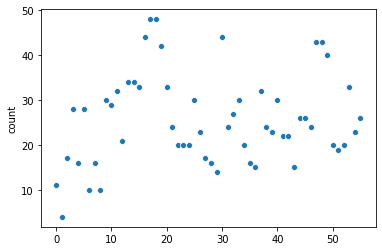

In [140]:
sns.scatterplot(data=pd_main, x=range(0, len(pd_main)), y='count')

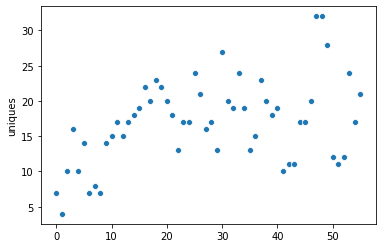

In [141]:
sns.scatterplot(data=pd_main, x=range(0, len(pd_main)), y='uniques')

In [23]:
# Check
# data = json.loads('07-27-2019_json.json')
# counts = data['count']
# uniques = data['uniques']
# timestamp_data = data['clones']
# df = pd.DataFrame(timestamp_data)
# df

In [24]:
!ls

07-27-2019_json.json  08-02-2019_json.json
07-30-2019_json.json  old_data_constructor.ipynb
